<a href="https://colab.research.google.com/github/sofiaortman/IA/blob/main/YOLO_parcial_listo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

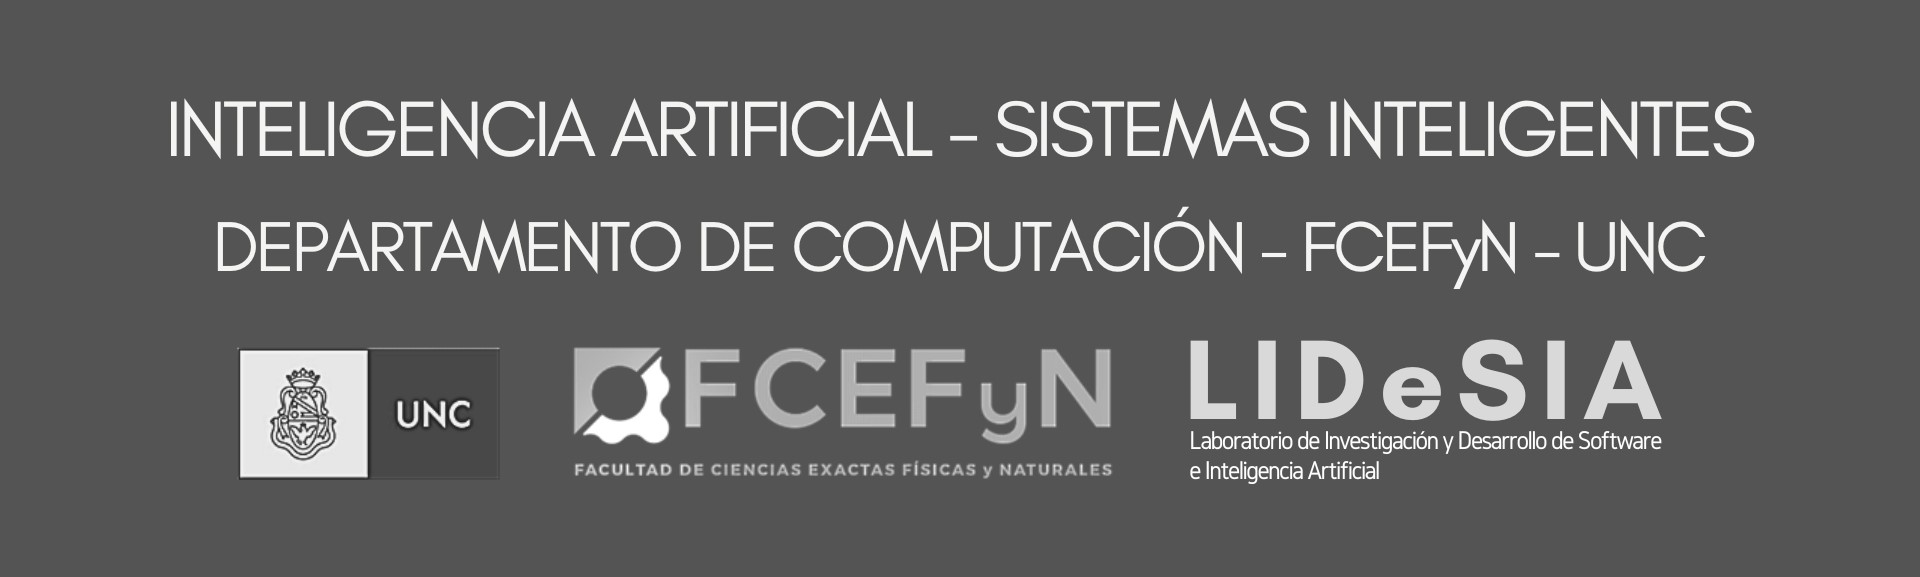

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import display, Image

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.7/645.7 kB 13.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
#importamos  a YOLO de ultralytics




---


# **TRAIN**


---

In [ ]:
#Entrenamiento
#pueden probar con otro modelo - acceder a ultralytics para ver el nombre y lo llaman en esta celda con la variable model
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/data.yaml epochs=100 imgsz=224 plots=True save=true

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/data.yaml, epochs=100, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

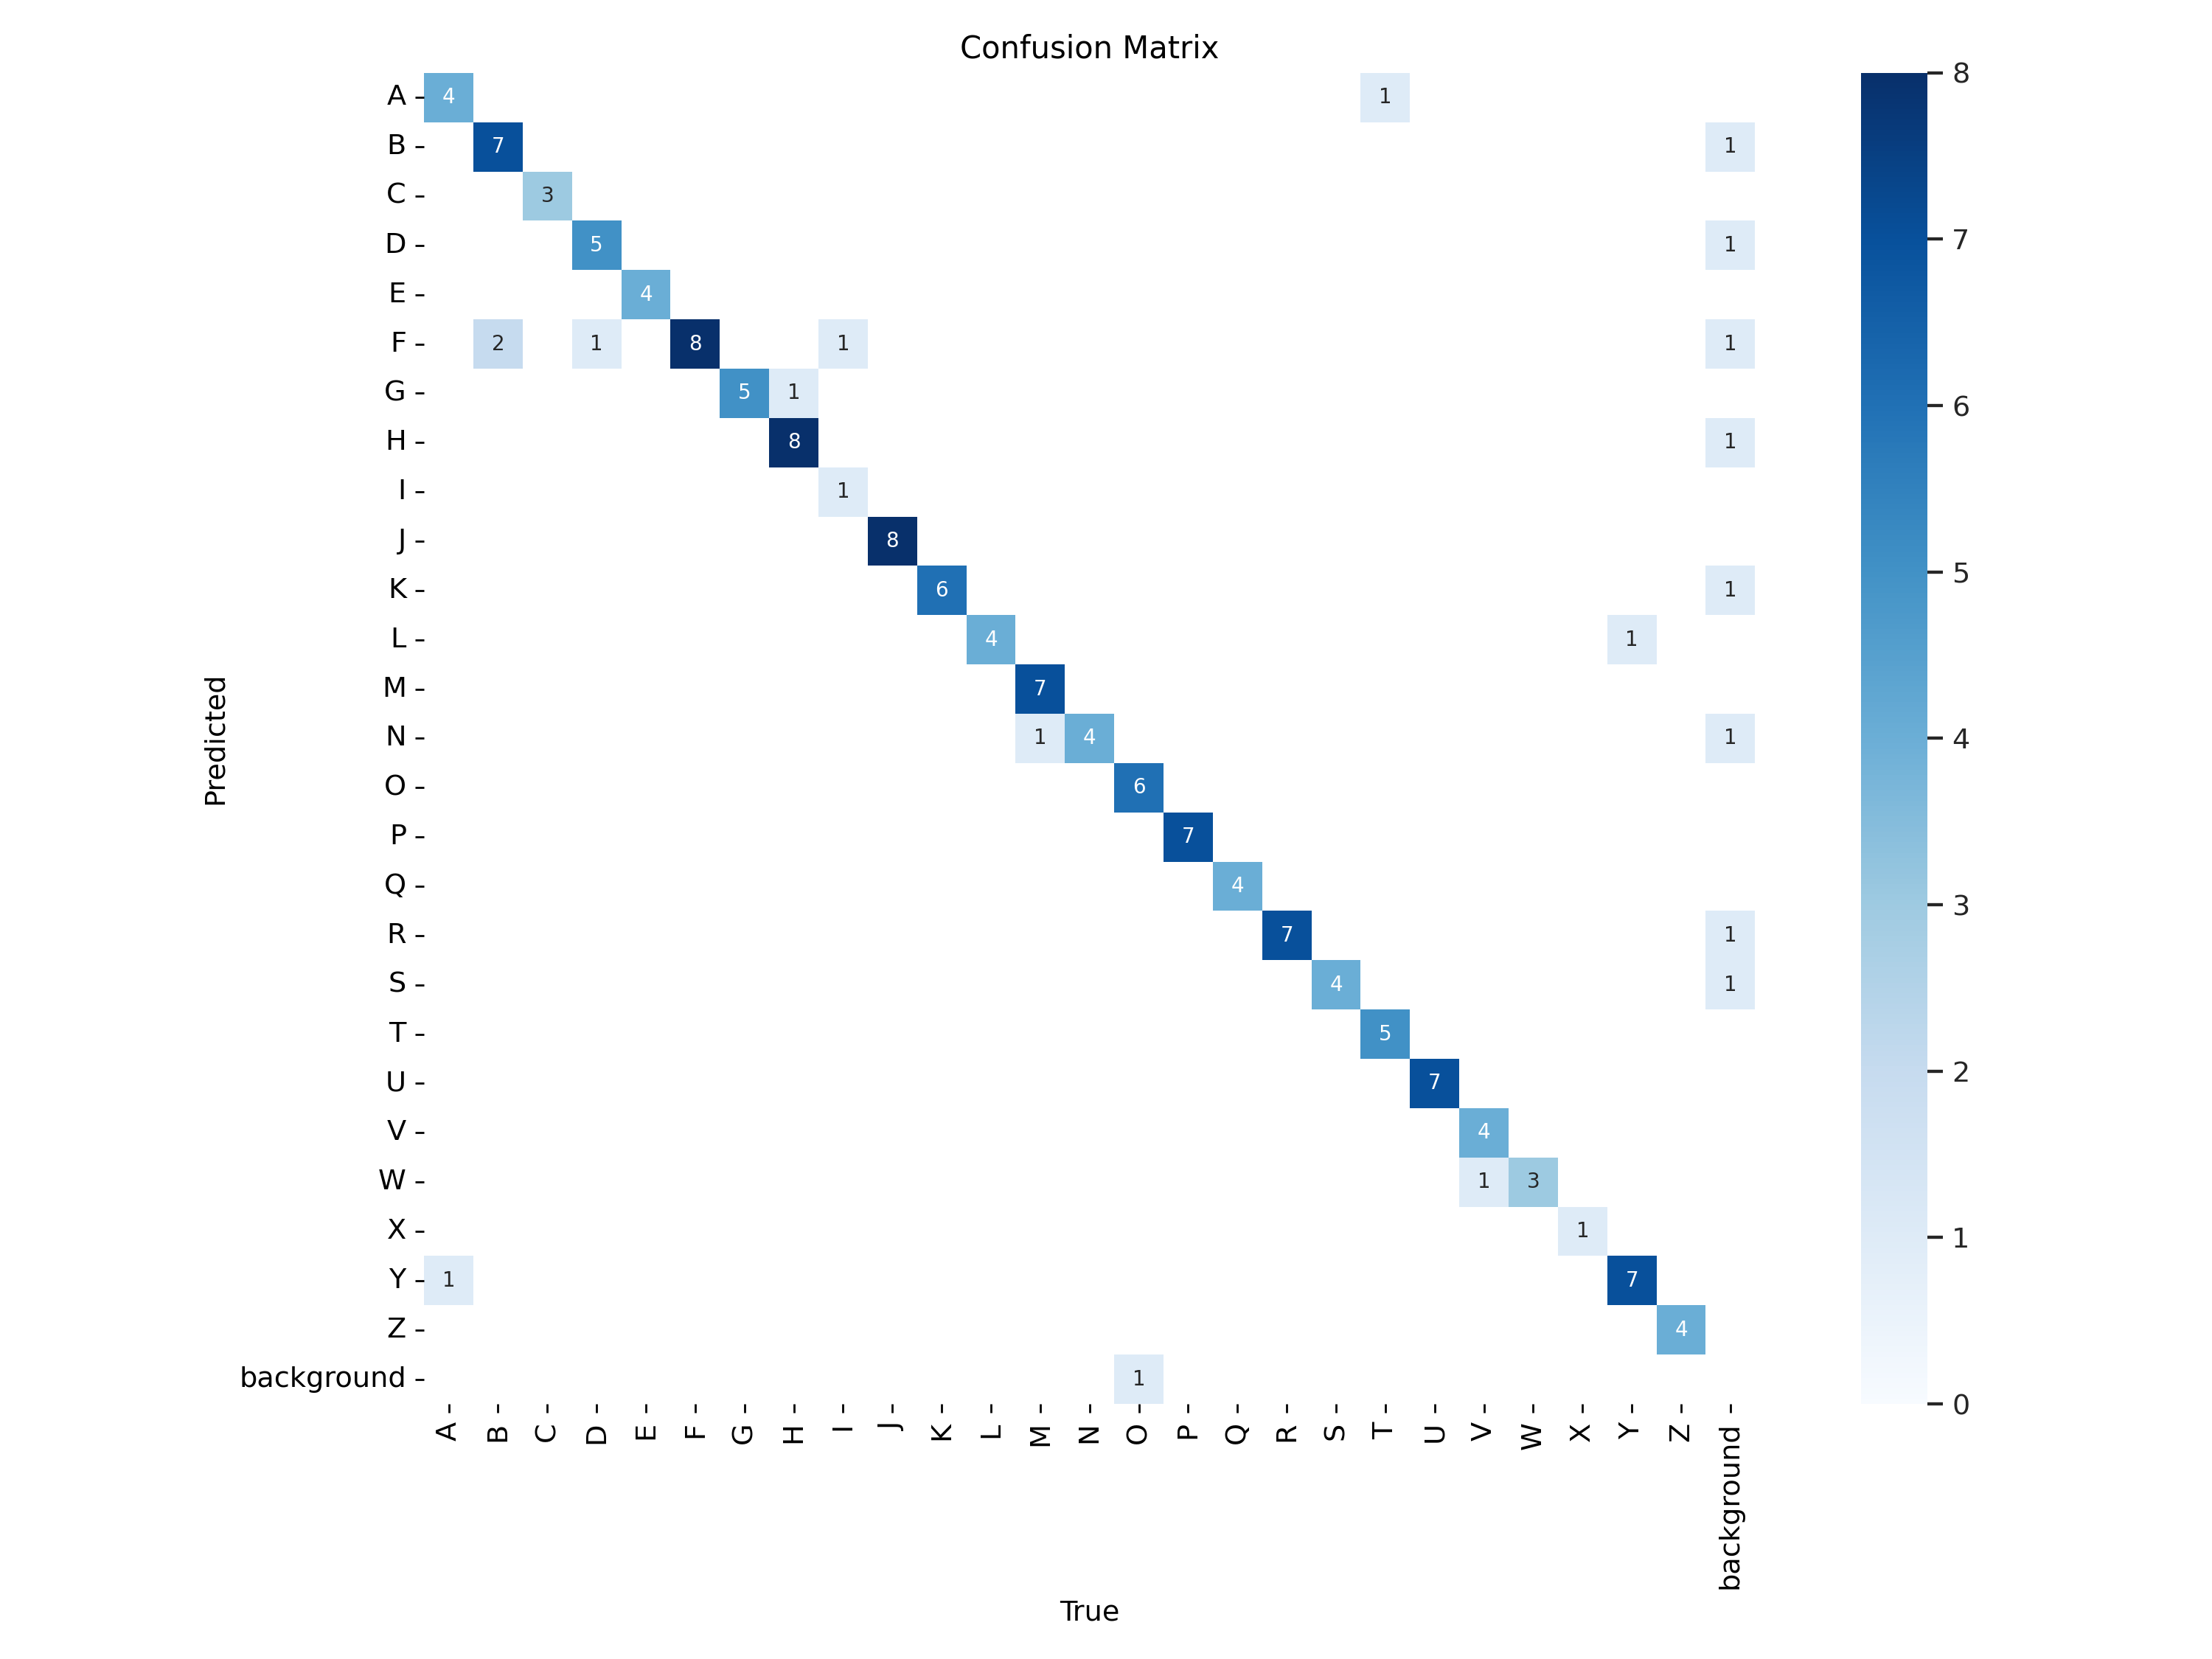

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)



---


# **VAL**


---

In [ ]:
#Validación del modelo
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=/content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/data.yaml

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854814 parameters, 0 gradients, 78.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1MXwWehS-kU2arJCktsxYB3pJIKaH5HHx/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/valid/labels.cache... 144 images, 0 backgrounds, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 9/9 [00:02<00:00,  3.63it/s]
                   all        144        144      0.943      0.906       0.97      0.922
                     A        144          5       0.87        0.6      0.866      0.866
                     B        144          9          1      0.814      0.995      0.957
                     C        144          3      0.969          1      0.995       0.85
                     D        144          6          1      0.925      0.995      0.974
                     E        144 

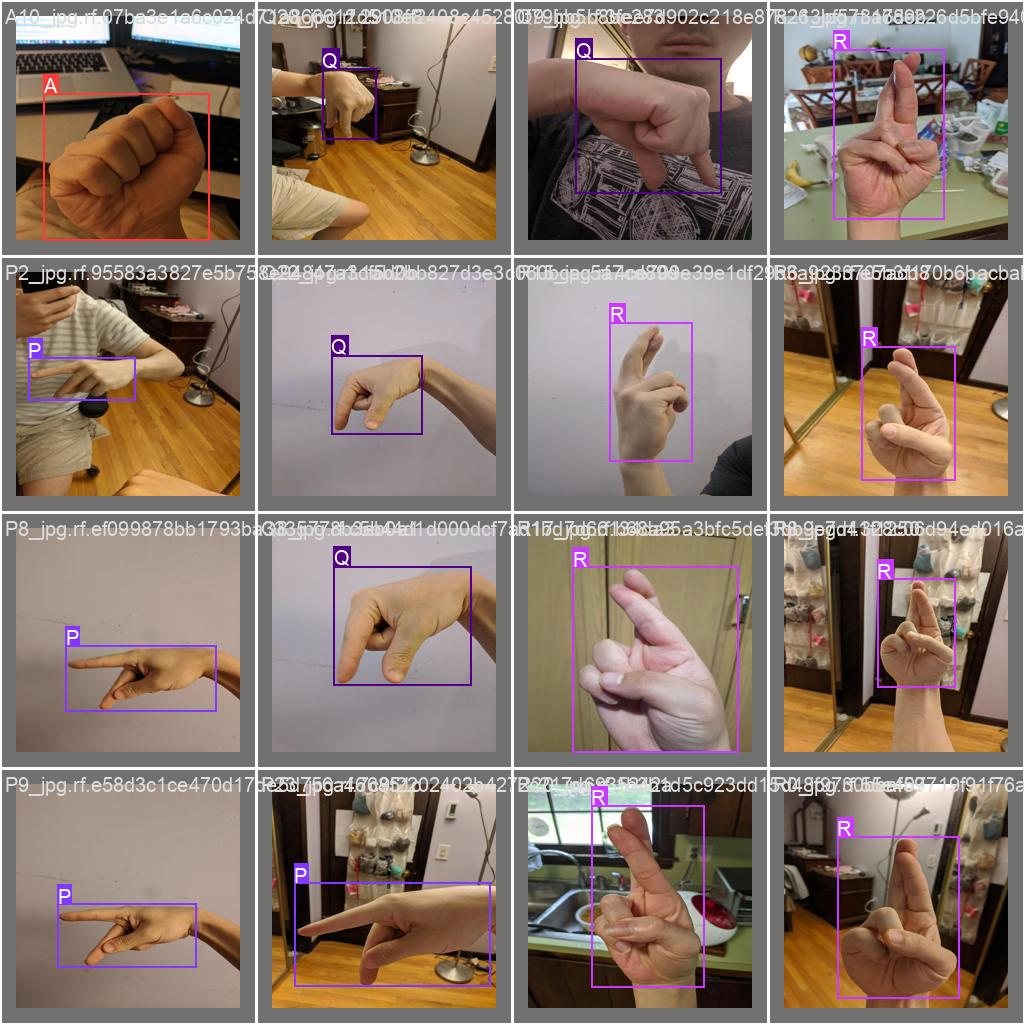

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch0_labels.jpg', width=600)

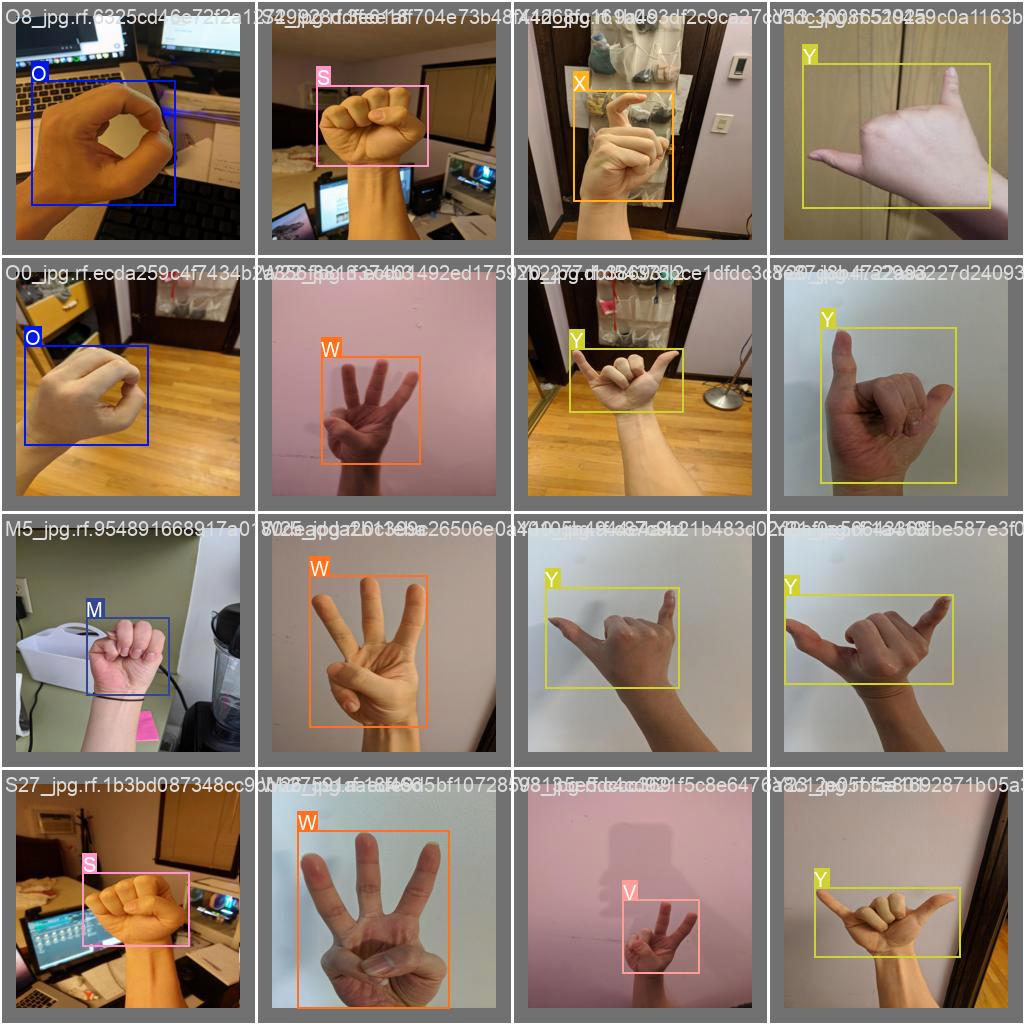

In [ ]:
Image(filename='/content/runs/detect/train3/val_batch1_labels.jpg', width=600)



---


# **TEST**


---


In [ ]:
!ls /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test #nos posicionamos en la carpeta test

images	labels


In [ ]:
#Test
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.60 source='/content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images'

Ultralytics YOLOv8.0.216 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25854814 parameters, 0 gradients, 78.8 GFLOPs

image 1/72 /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images/A22_jpg.rf.e1cbc5f5eb75fc10e80f6a2cabffe15a.jpg: 224x224 1 A, 19.7ms
image 2/72 /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images/B14_jpg.rf.9fb99e4f2f9c65a6031882aa9466b584.jpg: 224x224 1 B, 19.8ms
image 3/72 /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images/B15_jpg.rf.6e8ced906ec157197c6b3307a11ac84d.jpg: 224x224 1 B, 28.2ms
image 4/72 /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images/B19_jpg.rf.64fac11604c59fafa38af4593e934378.jpg: 224x224 1 B, 12.5ms
image 5/72 /content/drive/MyDrive/Grupo_IA/Segundo_parcial/dataset_parcial/data_yolo/test/images/C17_jpg.rf.80e505548c159252486b338c2a40d0c8.jpg: 224x224 1 C, 14.7ms


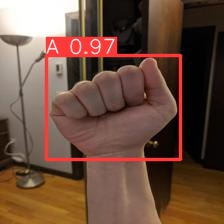

In [ ]:
Image(filename='/content/runs/detect/predict/A22_jpg.rf.e1cbc5f5eb75fc10e80f6a2cabffe15a.jpg', width=600)

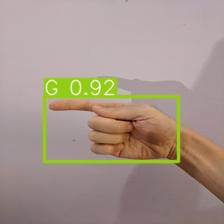

In [ ]:
Image(filename='/content/runs/detect/predict/G3_jpg.rf.77bf0bacfc7f3131b5041ff52351244a.jpg', width=600)

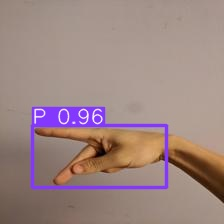

In [ ]:
Image(filename='/content/runs/detect/predict/P24_jpg.rf.45ccd0506872a8b5d1f450af36a32ebf.jpg', width=600)